# ANALYSIS


In [138]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import requests
import re 
from bs4 import BeautifulSoup as bs

class BearerAuth(requests.auth.AuthBase):
    def __init__(self, token):
        self.token = token
    def __call__(self, r):
        r.headers["authorization"] = "Bearer " + self.token
        return r
response = requests.get('https://the-one-api.herokuapp.com/v1/quote', auth=BearerAuth('l70E7VrdrFk2T1VvDoeZ'))
response
results=response.json()
results
data_quote=pd.DataFrame(response.json()['docs'])
data_quote
##This api shows the quote and the 









,_id,dialog,movie,character
0,5cd96e05de30eff6ebcce7e9,Deagol!,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfe9e
1,5cd96e05de30eff6ebcce7ea,Deagol!,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfe9e
2,5cd96e05de30eff6ebcce7eb,Deagol!,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfe9e
3,5cd96e05de30eff6ebcce7ec,Give us that! Deagol my love,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfe9e
4,5cd96e05de30eff6ebcce7ed,Why?,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfca7
...,...,...,...,...
2385,5cd96e05de30eff6ebccf13c,Merry!,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfe2e
2386,5cd96e05de30eff6ebccf13d,Merry!,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfbe6
2387,5cd96e05de30eff6ebccf13e,He's always followed me everywhere I went sinc...,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfc7c
2388,5cd96e05de30eff6ebccf13f,One thing I've learnt about Hobbits: They are ...,5cd95395de30eff6ebccde5d,5cd99d4bde30eff6ebccfbe6


In [139]:
scripts_=pd.read_csv('/Users/nayibahued/Desktop/web-project/scripts.csv')

In [140]:

cols = []
cols = scripts_.columns
cols = [i.upper() for i in cols]
scripts_.columns = cols
scripts_
scripts_=scripts_.rename(columns={'MOVIE':'NAME'})
scripts_['NAME'].unique()

array(['The Return of the King ', 'The Two Towers ',
       'The Fellowship of the Ring '], dtype=object)

In [141]:
scripts_['NAME'] = scripts_['NAME'].str.strip()
scripts_['NAME'].unique()

array(['The Return of the King', 'The Two Towers',
       'The Fellowship of the Ring'], dtype=object)

In [142]:
response_mov = requests.get('https://the-one-api.herokuapp.com/v1/movie', auth=BearerAuth('l70E7VrdrFk2T1VvDoeZ'))

results_mov=response_mov.json()
results_mov
movies_=pd.DataFrame(response_mov.json()['docs'])
movies_
##Im gonna drop the 'series' columns because they represent the joint of the 3 LOTR and The Hobbit movies
##And the hobbits series too
movies_.drop(movies_.index[[0,1,2,3,4]], inplace=True)
movies_
movies_.drop(['budgetInMillions','boxOfficeRevenueInMillions'], axis=1, inplace=True)
movies_
##Im appending the year of release in a new column
Release_year=[2002,2001,2003]
movies_['Release_year']=Release_year
movies_
data_mov= movies_.sort_values(by=['Release_year'], ascending=True)
#data_mov.rename({'name':'movie'}, axis=1)
data_mov
cols_mov = []
cols_mov = data_mov.columns
cols_mov = [i.upper() for i in cols_mov]
data_mov.columns = cols_mov
data_mov['NAME'].unique()
data_mov['NAME'] = data_mov['NAME'].str.strip()
data_mov['NAME'].unique()

array(['The Fellowship of the Ring', 'The Two Towers',
       'The Return of the King'], dtype=object)

In [151]:
##Merging the csv with the api, to add movie info
quote_movie_info=pd.merge(scripts_,data_mov,on='NAME',how='inner')

quote_movie_info['NAME'].unique()
df_1=quote_movie_info.copy()
df_1.drop(['UNNAMED: 0'], axis=1, inplace=True)
df_1['DIALOG'].unique()
df_1['DIALOG']=df_1['DIALOG'].str.strip()
df_1['DIALOG']=df_1['DIALOG'].str.replace('\xa0','')
df_1['DIALOG'].unique()
#Now that I cleaned the dialogs, I would like to sort them by the length
dia=str(df_1['DIALOG'])

len(dia)
#for entry in dia:
#    l = len(entry)
#    lgth.append(l)

#len(lgth)
#Im gonna add the lgth list to sort the dialogs
#df_1['DL_LEN'] = lgth
df_1
df_1['DIA_LGTH'] = df_1[str('DIALOG')].map(str).apply(len)
df_1

df_2 = df_1.sort_values(by=['DIA_LGTH'], ascending=False)
df_2
    

,CHAR,DIALOG,NAME,_ID,RUNTIMEINMINUTES,ACADEMYAWARDNOMINATIONS,ACADEMYAWARDWINS,RELEASE_YEAR,DIA_LGTH
1425,GANDALF,"Sauron fears you, Aragorn.He fears what you ma...",The Two Towers,5cd95395de30eff6ebccde5b,179,6,2,2002,814
90,SARUMAN,So you have come here for information. I have ...,The Return of the King,5cd95395de30eff6ebccde5d,201,11,11,2003,700
788,GANDALF,They guard it because they have hope. A faint ...,The Return of the King,5cd95395de30eff6ebccde5d,201,11,11,2003,669
2169,BILBO,"Frodo, someone at the door. ,In fact, it ...",The Fellowship of the Ring,5cd95395de30eff6ebccde5c,178,13,4,2001,561
252,LEGOLAS,One that is cursed. Long ago the men of the mo...,The Return of the King,5cd95395de30eff6ebccde5d,201,11,11,2003,555
...,...,...,...,...,...,...,...,...,...
1386,EOWYN,,The Two Towers,5cd95395de30eff6ebccde5b,179,6,2,2002,0
1884,STRIDER,,The Fellowship of the Ring,5cd95395de30eff6ebccde5c,178,13,4,2001,0
1879,TREEBEARD,,The Two Towers,5cd95395de30eff6ebccde5b,179,6,2,2002,0
655,THEODEN,,The Return of the King,5cd95395de30eff6ebccde5d,201,11,11,2003,0


In [152]:
#Now for the web-scrape, I´m gonna add the ratings from imdb for each movie

##Return of the king
url = 'https://www.imdb.com/title/tt0167260/?ref_=rvi_tt'
wd = requests.get(url)
wd

wd_cont=wd.content
soup_3=bs(wd_cont, 'html.parser')
score=[]

table_3 = soup_3.find("div",{"class":"title-overview"})
table_4 = soup_3.find("div",{"class":"metacriticScore score_favorable titleReviewBarSubItem"})
table_11=soup_3.find('div',{'class':'plot_summary'})

for scr in table_3.find_all("strong"):
    score.append(scr.text)

for met in table_4.find_all("span"):
    score.append(met.text)

for wrt in table_11.find_all('div'):
    score.append(wrt.text)


score = [i.replace('\n','').strip() for i in score]
score
score_c=score[0:3]
score_c






['8.9',
 '94',
 "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring."]

In [154]:
##Fellowship
    
url = 'https://www.imdb.com/title/tt0120737/?ref_=rvi_tt'
wd_1 = requests.get(url)
wd_1

wd1_cont=wd_1.content
soup_4=bs(wd1_cont, 'html.parser')
score_1=[]

table_5 = soup_4.find("div",{"class":"title-overview"})
table_6 = soup_4.find("div",{"class":"metacriticScore score_favorable titleReviewBarSubItem"})
table_9=soup_4.find('div',{'class':'plot_summary'})

for sr in table_5.find_all("strong"):
    score_1.append(sr.text)

for mt in table_6.find_all("span"):
    score_1.append(mt.text)

for wrt in table_9.find_all("div"):
    score_1.append(wrt.text)


score_1 = [i.replace('\n','').strip() for i in score_1]
score_1
score_1_c=score_1[0:3]
score_1_c


['8.8',
 '92',
 'A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.']

In [155]:
##Two towers
url = 'https://www.imdb.com/title/tt0167261/'
wd_2 = requests.get(url)
wd_2

wd2_cont=wd_2.content
soup_5=bs(wd2_cont, 'html.parser')
score_2=[]

table_7 = soup_5.find("div",{"class":"title-overview"})
table_8 = soup_5.find("div",{"class":"metacriticScore score_favorable titleReviewBarSubItem"})
table_10=soup_5.find('div',{'class':'plot_summary'})

for sr in table_7.find_all("strong"):
    score_2.append(sr.text)

for mt in table_8.find_all("span"):
    score_2.append(mt.text)

for wrt in table_10.find_all("div"):
    score_2.append(wrt.text)


score_2 = [i.replace('\n','').strip() for i in score_2]
score_2_c=score_2[0:3]
score_2_c

['8.7',
 '87',
 "While Frodo and Sam edge closer to Mordor with the help of the shifty Gollum, the divided fellowship makes a stand against Sauron's new ally, Saruman, and his hordes of Isengard."]

In [156]:
movs=['The Return of the King','The Fellowship of the Ring','The Two Towers']
final_lst=[]

final_lst.append(score_c)
final_lst.append(score_1_c)
final_lst.append(score_2_c)
final_lst

[['8.9',
  '94',
  "Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring."],
 ['8.8',
  '92',
  'A meek Hobbit from the Shire and eight companions set out on a journey to destroy the powerful One Ring and save Middle-earth from the Dark Lord Sauron.'],
 ['8.7',
  '87',
  "While Frodo and Sam edge closer to Mordor with the help of the shifty Gollum, the divided fellowship makes a stand against Sauron's new ally, Saruman, and his hordes of Isengard."]]

In [157]:
web_scr = pd.DataFrame(columns=['IMDB','METASCORE','DESCRIPTION'], data=final_lst)

In [158]:
web_scr

,IMDB,METASCORE,DESCRIPTION
0,8.9,94,Gandalf and Aragorn lead the World of Men agai...
1,8.8,92,A meek Hobbit from the Shire and eight compani...
2,8.7,87,While Frodo and Sam edge closer to Mordor with...


In [169]:
web_scr['NAME']=movs
web_scr
web_scr['NAME'].unique()

array(['The Return of the King', 'The Fellowship of the Ring',
       'The Two Towers'], dtype=object)

In [208]:
df_cop=df_2.copy()
df_final=pd.merge(df_cop,web_scr,on='NAME',how='inner')
df_final=df_final.sort_values(by=['DIA_LGTH'], ascending=False)
df_final
df_final['CHAR'].unique()


array(['GANDALF', 'SARUMAN', 'BILBO', 'LEGOLAS', 'DENETHOR',
       'GALADRIEL VOICE OVER', 'GAN DALF', 'STRIDER', 'ARAGORN', 'MERRY',
       'SAM', 'BILBO VOICEOVER', 'EOMER', 'THEODEN', 'MERRY and PIPPIN',
       'SAM VOICEOVER', 'BOROMIR', 'GRIMA', 'GOLLUM', 'ELROND', 'FARAMIR',
       'FRODO', 'ELROND VOICEOVER', 'TREEBEARD', 'MADRIL', 'EOWYN',
       'SARUMAN VOICE OVER ', 'ORC', 'GIMLI', 'PIPPIN', 'BARLIMAN',
       'FRODO VOICE OVER', 'SARUMAN VOICE OVER', 'MOUTH OF SAURON',
       'GANDALF VOICEOVER', 'SHAGRAT', 'ARWEN', 'GALADRIEL VOICEOVER',
       'KING OF THE DEAD', 'GATEKEEPER', 'SMEAGOL', 'GANDALF VOICE OVER',
       'FARMER MAGGOT', 'SANDYMAN', '\xa0GANDALF', 'SOLDIER', 'SAM ',
       'GAMLING', 'ARWEN VOICEOVER', 'GATEKEEPR', 'HAMA', 'GAFFER',
       'GOTHMOG', 'GALADRIEL', 'GALADRIEL VOICE-OVER', 'UGLUK',
       'GALADRIL', 'SAURON VOICE', 'MORWEN', 'WITCH KING', 'URUK-HAI',
       'ROHAN STABLEMAN', 'SOLDIERS', 'IROLAS', 'NOAKES', 'HALDIR',
       'SARUMAN VOICEOVER',

In [212]:
df_final['CHAR'] =df_final['CHAR'].str.replace('GALADRIEL VOICE OVER', 'GALADRIEL')
df_final['CHAR'] =df_final['CHAR'].str.replace('GAN DALF', 'GANDALF')
df_final['CHAR'] =df_final['CHAR'].str.replace('BILBO VOICEOVER', 'BILBO')
df_final['CHAR'] =df_final['CHAR'].str.replace('SAM VOICEOVER', 'SAM')
df_final['CHAR'] =df_final['CHAR'].str.replace('ELROND VOICEOVER', 'ELROND')
df_final['CHAR'] =df_final['CHAR'].str.replace('SARUMAN VOICE OVER ', 'SARUMAN')
df_final['CHAR'] =df_final['CHAR'].str.replace('FRODO VOICE OVER', 'FRODO')
df_final['CHAR'] =df_final['CHAR'].str.replace('SARUMAN VOICE OVER', 'SARUMAN')
df_final['CHAR'] =df_final['CHAR'].str.replace('GANDALF VOICEOVER', 'GANDALF')
df_final['CHAR'] =df_final['CHAR'].str.replace('GALADRIEL VOICEOVER', 'GALADRIEL')
df_final['CHAR'] =df_final['CHAR'].str.replace('GANDALF VOICE OVER', 'GANDALF')
df_final['CHAR'] =df_final['CHAR'].str.replace('\xa0GANDALF', 'GANDALF')
df_final['CHAR'] =df_final['CHAR'].str.replace('SAM ', 'SAM')
df_final['CHAR'] =df_final['CHAR'].str.replace('ARWEN VOICEOVER', 'ARWEN')
df_final['CHAR'] =df_final['CHAR'].str.replace('GALADRIEL VOICE-OVER', 'GALADRIEL')
df_final['CHAR'] =df_final['CHAR'].str.replace('GALADRIL', 'GALADRIEL')
df_final['CHAR'] =df_final['CHAR'].str.replace('SARUMAN VOICEOVER', 'SARUMAN')
df_final['CHAR'] =df_final['CHAR'].str.replace('ARGORN', 'ARAGORN')
df_final['CHAR'] =df_final['CHAR'].str.replace('ARAGORN ', 'ARAGORN')
df_final['CHAR'] =df_final['CHAR'].str.replace('FRODO ', 'FRODO')
df_final['CHAR'] =df_final['CHAR'].str.replace('FRODO VOICE', 'FRODO')
df_final['CHAR'] =df_final['CHAR'].str.replace('EYE OF SAURON', 'SAURON')
df_final['CHAR'] =df_final['CHAR'].str.replace('MOUTH OF SAURON', 'SAURON')

df_final['CHAR'].unique()


array(['GANDALF', 'SARUMAN', 'BILBO', 'LEGOLAS', 'DENETHOR', 'GALADRIEL',
       'STRIDER', 'ARAGORN', 'MERRY', 'SAM', 'EOMER', 'THEODEN',
       'MERRY and PIPPIN', 'BOROMIR', 'GRIMA', 'GOLLUM', 'ELROND',
       'FARAMIR', 'FRODO', 'TREEBEARD', 'MADRIL', 'EOWYN', 'ORC', 'GIMLI',
       'PIPPIN', 'BARLIMAN', 'SAURON', 'SHAGRAT', 'ARWEN',
       'KING OF THE DEAD', 'GATEKEEPER', 'SMEAGOL', 'FARMER MAGGOT',
       'SANDYMAN', 'SOLDIER', 'GAMLING', 'GATEKEEPR', 'HAMA', 'GAFFER',
       'GOTHMOG', 'UGLUK', 'SAURON VOICE', 'MORWEN', 'WITCH KING',
       'URUK-HAI', 'ROHAN STABLEMAN', 'SOLDIERS', 'IROLAS', 'NOAKES',
       'HALDIR', 'CAPTAIN', 'SNAGA', 'GRISHNAK', 'GENERAL', 'GRISHNAKH',
       'DEAGOL', 'PEOPLE', 'SHARKU', 'RING', 'WHITE WIZARD', 'HOBBIT',
       'FREDA', 'CHILDREN HOBBITS', 'GORBAG', 'MAN', 'GRIMBOLD',
       'URUK HAI', 'ORCS', 'FIGWIT', 'SOLDIER 2', 'GENERAL SHOUT',
       'SOLDIERS IN MINAS TIRITH', 'BOSON', 'MERCENARY', 'LADY',
       'SOLDIER 1', 'ROHAN HORSEMAN', 'WI

In [213]:
df_final.to_csv('/Users/nayibahued/Desktop/web-project/lotr_final.csv', index = False)


# INSIGHTS

In [228]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas_bokeh

pandas_bokeh.output_notebook()
 
print("This shows the length of the dialogues of all characters from max to min in the series")

df_final.plot_bokeh(
    kind='bar',
    x='CHAR',
    y=['DIA_LGTH', 'NAME'],
    xlabel='UNREADABLE CHARACTERS',
    ylabel='LENGTH-MOVIES PROGRESS',
    title='LENGTH-MOVIE PROGRESS'
)


Loading BokehJS ...

This shows the length of the dialogues of all characters from max to min in the series


Figure(id='1310', ...)

In [227]:
##new dataframe for ploting top ten length dialogues
chars=df_final['CHAR'].to_list()
dlg_len=df_final['DIA_LGTH'].to_list()
names=df_final['NAME'].to_list()
cols=['CHAR','LGT','NAME']
plot_df=pd.DataFrame({'CHAR':chars[:10],'LGT':dlg_len[:10],'NAME':names[:10]})
plot_df

,CHAR,LGT,NAME
0,GANDALF,814,The Two Towers
1,SARUMAN,700,The Return of the King
2,GANDALF,669,The Return of the King
3,BILBO,561,The Fellowship of the Ring
4,LEGOLAS,555,The Return of the King
5,DENETHOR,527,The Return of the King
6,GALADRIEL,493,The Fellowship of the Ring
7,GANDALF,482,The Return of the King
8,BILBO,442,The Fellowship of the Ring
9,BILBO,432,The Fellowship of the Ring


In [232]:
print("Here we have the 10 longest lines in the series, with the character that recited them")
plot_df.plot_bokeh(
    kind='bar',
    x='CHAR',
    y='LGT',
    xlabel='CHARACTERS',
    ylabel='LINE LENGTH',
    title='TOP 10 LONGEST LINES'
)

Here we have the 10 longest lines in the series, with the character that recited them


Figure(id='1733', ...)

In [268]:
#Top 10 word frequency in the script
import matplotlib.pyplot as plt
dlgs=df_final['DIALOG'].to_list()
dlgs=str(dlgs)
wordList = re.sub("[^\w]", " ",dlgs).split()
wordList
from collections import Counter
dic_dlg=Counter(wordList)
dic_dlg
srt=sorted(dic_dlg.items(), key=lambda x:x[1],reverse=True)
lst=srt[:10]

print('The top 10 frequency of words in the script is the following',lst)


The top 10 frequency of words in the script is the following [('the', 940), ('of', 578), ('to', 543), ('you', 519), ('I', 519), ('s', 388), ('is', 343), ('and', 331), ('it', 328), ('a', 318)]


This pie plot shows us the distribution by character of the 50 longest lines


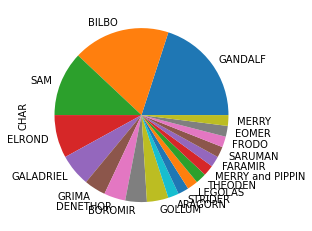

In [276]:

print("This pie plot shows us the distribution by character of the 50 longest lines")
df_f = df_final[:50].copy()
df_f['CHAR'].value_counts().plot(kind = 'pie')